![logo.png](https://github.com/interviewquery/takehomes/blob/stripe_1/stripe_1/logo.png?raw=1)



## Assignment

You are leading a project to analyze product performance at Stripe. We at Stripe are most interested in how the products are performing and growing as well as how to prioritize our product development efforts to maximize our growth. You have been provided an initial cut of data on a few flagship products, each of which is targeted at a specific user segment. From the data you've been given, please prepare a short presentation detailing your findings.

**Product Usage Table:**

|Label| Description|
| - | :- |  
| `merchant` | This is the unique ID of each Stripe user |
|`date` | Data is aggregated up to the month level for each Stripe user.|
|`product` | This is the Stripe product that the user is using to charge their customers.|
|`event` | This is an action within a product. For more details on how products are used, see "segment details" below|
|`count of events` |       |
|`usd_amount` |Total amount in cents and USD that was processed for that API call|

**Segment Table:**

This is a mapping of merchant IDs to the user segmentation we have.

|Label| Description|
| - | :- |
|`saas`| These businesses serve SaaS products which means they primarily charge their customers on a recurring basis (usually   monthly). We want them to use our Subscriptions payments product to charge regularly on a time interval.|
|`ecommerce` | These businesses use Stripe's shopping cart product and primarily sell physical or digital goods online. |
|`platforms` | These users are platforms upon which other users can sign up and charge for services through the Stripe API. Examples would include ridesharing services, delivery services, etc. (e.g. Lyft, Task Rabbit, Instacart) |


## Segment Details

### SaaS

SaaS users have two options when they process recurring payments. The recurring payments product allows them to schedule automatically recurring payments on a fixed schedule, but the merchants can also manually create charges on Stripe for their recurring payments. Our hope with the recurring payments product is to make it easy for all users to automate their payments. The product was launched in May 2013.

### E-Commerce Store

Our shopping cart product enables online e-commerce stores to sell goods. We track details on their website around the conversion funnel and actions that customers take. We can see when an item is viewed, added to the cart, when the checkout flow is initiated, and when it is completed with a payment submitted.

### Platforms

Our Marketplace product allows platforms to charge on behalf of other users and payout funds to each end automatically.



### Questions to guide thinking:

1. How are each of Stripe's products and segments performing and where are they headed?

2. Are there any issues with the products that we should address?

3. Given more time and access to more data, what would you want to dig deeper on?

4. How should we prioritize development for different products, given our limited resources?




In [1]:
!git clone --branch stripe_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/stripe_1
!if [[ $(ls *.zip) ]]; then unzip *.zip; fi
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1928 (delta 726), pack-reused 0
Receiving objects: 100% (1963/1963), 297.43 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/takehomes/stripe_1
ls: cannot access '*.zip': No such file or directory
logo.png  product_usage.csv  segmentation.csv  takehomefile.ipynb


In [2]:
import pandas as pd

product_usage = pd.read_csv('product_usage.csv')
segment = pd.read_csv('segmentation.csv')

product_usage.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
product_usage = product_usage[['Merchant', 'Date', 'Product', 'Event', 'Count of events', 'Usd Amount']]
product_usage.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount
0,282t1vpldi,01/01/2013,Basic API,Charge,33.0,329967.0
1,282t1vpldi,01/02/2013,Basic API,Charge,17.0,169983.0
2,282t1vpldi,01/03/2013,Basic API,Charge,20.0,199980.0
3,282t1vpldi,01/04/2013,Basic API,Charge,21.0,209979.0
4,282t1vpldi,01/05/2013,Recurring,Subscription.Charge,23.0,229977.0


In [66]:
product_usage = product_usage[~product_usage['Product'].isna()]
product_usage.isna().sum()

Merchant             0
Date                 0
Product              0
Event                0
Count of events      0
Usd Amount         654
Month                0
Year                 0
dtype: int64

In [72]:
product_usage.groupby('Product')['Usd Amount'].apply(lambda x: (~x.isna()).sum())

Product
Basic API        78
Cart            218
Marketplaces    202
Recurring       100
Name: Usd Amount, dtype: int64

In [73]:
product_usage.dropna(inplace=True)

In [74]:
product_usage['Date'] = pd.to_datetime(product_usage['Date'])
product_usage['Month'] = product_usage['Date'].dt.month
product_usage['Year'] = product_usage['Date'].dt.year
product_usage.head()

,Merchant,Date,Product,Event,Count of events,Usd Amount,Month,Year
0,282t1vpldi,2013-01-01,Basic API,Charge,33.0,329967.0,1,2013
1,282t1vpldi,2013-01-02,Basic API,Charge,17.0,169983.0,1,2013
2,282t1vpldi,2013-01-03,Basic API,Charge,20.0,199980.0,1,2013
3,282t1vpldi,2013-01-04,Basic API,Charge,21.0,209979.0,1,2013
4,282t1vpldi,2013-01-05,Recurring,Subscription.Charge,23.0,229977.0,1,2013


In [75]:
product_growth = product_usage.groupby(['Product', 'Year'])[['Usd Amount', 'Count of events']].sum().reset_index().sort_values(by=['Product', 'Year'])
product_growth

,Product,Year,Usd Amount,Count of events
0,Basic API,2013,25507208.0,8389.0
1,Basic API,2014,60970458.0,45872.0
2,Cart,2013,170822087.0,90386.0
3,Cart,2014,387688583.0,188449.0
4,Marketplaces,2013,674669133.0,232075.0
5,Marketplaces,2014,857328305.0,290027.0
6,Recurring,2013,12543585.0,18137.0
7,Recurring,2014,36304888.0,105855.0


In [76]:
# plot a bar plot with product on x axis with year and Usd amount on y
product_growth['yoy_growth'] = product_growth.groupby('Product')['Usd Amount'].pct_change() * 100
product_growth['yoy_growth_events'] = product_growth.groupby('Product')['Count of events'].pct_change() * 100

In [77]:
product_growth

,Product,Year,Usd Amount,Count of events,yoy_growth,yoy_growth_events
0,Basic API,2013,25507208.0,8389.0,NaN,NaN
1,Basic API,2014,60970458.0,45872.0,139.032269,446.811301
2,Cart,2013,170822087.0,90386.0,NaN,NaN
3,Cart,2014,387688583.0,188449.0,126.954599,108.493572
4,Marketplaces,2013,674669133.0,232075.0,NaN,NaN
5,Marketplaces,2014,857328305.0,290027.0,27.073889,24.971238
6,Recurring,2013,12543585.0,18137.0,NaN,NaN
7,Recurring,2014,36304888.0,105855.0,189.429920,483.641175


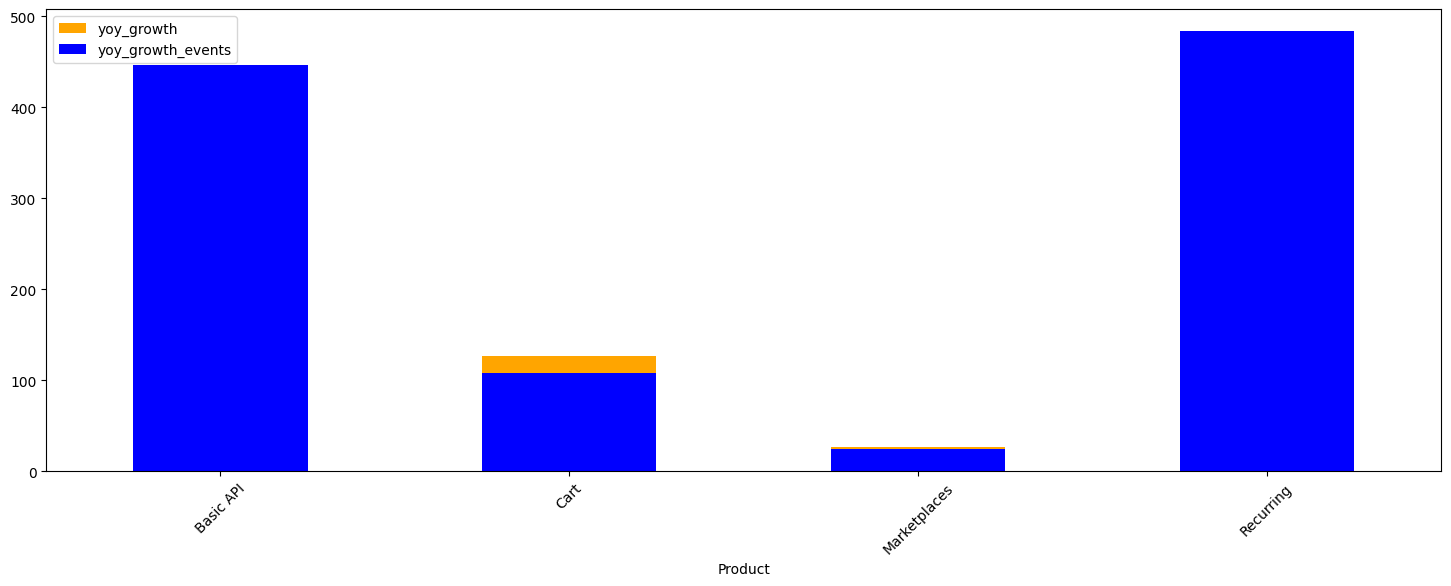

In [78]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(18, 6))
product_growth.dropna().plot(kind='bar', x='Product', y='yoy_growth', rot=45, ax=ax, color='orange')
product_growth.dropna().plot(kind='bar', x='Product', y='yoy_growth_events', rot=45, ax=ax, color='blue')
plt.show()

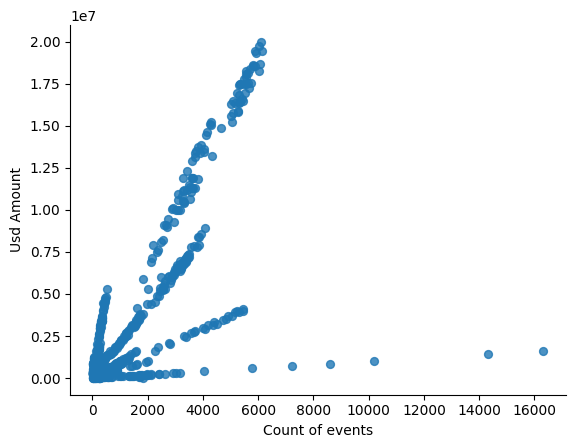

In [8]:
# @title Count of events vs Usd Amount

from matplotlib import pyplot as plt
product_usage.plot(kind='scatter', x='Count of events', y='Usd Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
product_usage[['Event', 'Product']].value_counts()

Event                Product     
Cart.AddItem         Cart            218
Cart.Checkout        Cart            218
Cart.PaymentSubmit   Cart            218
Cart.ViewItem        Cart            218
Marketplace.Charge   Marketplaces    202
Subscription.Charge  Recurring       100
Charge               Basic API        78
Name: count, dtype: int64

In [20]:
product_usage['Merchant'].value_counts()

Merchant
zz8yi2lz0k9    96
wzimmlvj9k9    96
w1x4pumobt9    96
nsoxg9fi529    96
wtnlnqrrudi    84
fix7e4xtj4i    80
8kkxv1xxbt9    68
rczsldz33di    68
9vd51p2e29     56
tgiaz41jor     52
yadjx8estt9    48
2x5fpa2a9k9    25
awzc15rk9      25
r1aca4z33di    24
q5o0270t3xr    24
obpa1e89f6r    24
282t1vpldi     24
hkw5486w29     24
3r5r60f6r      24
hu22wwpcik9    24
4p36czyqfr     22
gtey5htzkt9    20
c5dxqolxr      20
5ellnhilik9    20
ctow2fenrk9    19
50zxrqc9pb9    19
u9nzlgqr529    17
jrb04vuc8fr    14
39rrckrzfr     13
a9jszcl3di     12
jstcqq9qkt9     9
m6jyvblc8fr     6
lv6bu51att9     3
Name: count, dtype: int64

In [24]:
segment['Segment'].value_counts()

Segment
E-Commerce Store    13
SaaS                11
Platform             9
Name: count, dtype: int64